In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt




In [2]:
# Rutas base
asociaciones_path = "base/asociaciones.json"
datos_pacientes_path = "base/datos_pacientes.sav"
carpeta_resultados = "resultados"



In [3]:
# Cargar asociaciones video -> nombre
with open(asociaciones_path, "r", encoding="utf-8") as f:
    asociaciones = json.load(f)

In [4]:
# Invertir: nombre -> video
nombre_a_video = {v.strip().upper(): k for k, v in asociaciones.items()}



In [5]:
# Leer archivo .sav con pandas
df = pd.read_spss(datos_pacientes_path)


In [6]:
# Normalizar nombre para hacer match
df["video"] = df["NOMBRE"].str.upper().map(nombre_a_video)
df["ppm_promedio"] = None


In [7]:
import glob

# === EXTRAER PPM DESDE JSON POR VIDEO ===
for idx, row in df.iterrows():
    video = row["video"]
    if pd.notna(video):
        video_name = os.path.splitext(video)[0]  # Quitar extensión .mp4
        carpeta_video = os.path.join(carpeta_resultados, video_name)
        
        # Buscar archivo que comience con 'resumen_fluidez_'
        posibles = glob.glob(os.path.join(carpeta_video, "resumen_fluidez_*.json"))
        if posibles:
            resumen_path = posibles[0]
            try:
                with open(resumen_path, "r", encoding="utf-8") as f:
                    resumen = json.load(f)
                    df.at[idx, "ppm_promedio"] = resumen.get("ppm_promedio")
            except Exception as e:
                print(f"⚠️ Error al procesar {resumen_path}: {e}")


# === CREAR NUEVO DATAFRAME SOLO CON NOMBRE, DNOpositivos Y PPM ===
df_salida = df[["NOMBRE", "PHESpositivo", "ppm_promedio"]].copy()

# === GUARDAR CSV DE RESULTADO ===
df_salida.to_csv("salida_ppm_por_paciente.csv", index=False, encoding="utf-8")
print("✅ Archivo generado: salida_ppm_por_paciente.csv")

df

✅ Archivo generado: salida_ppm_por_paciente.csv


,V1,GrupoTxACtrlBNAC,FECHAEVALUACIÓN,ECU,NOMBRE,SEXOM0F1,EDAD,FECHADENACIMIENTO,ESCOLARIDAD,ETIOLOGÍA,...,TRANSPLANTABLES,DNOpositivos,DNOpositivos16.5,DNOpositivos15.5,DNOpositivossinoutliers,s_ANT,VAR00001,grupo2,video,ppm_promedio
0,118.0,,1109/2023,NaN,ROSA ELVIRA AMARO VALENCIA,1.0,35.0,32129,16.0,,...,NaN,0.0,0.0,0.0,0.0,23.0,0.0,2.0,NaN,None
1,72.0,A,45042,NaN,RODRIGUEZ MANCERA MARIA GUADALUPE,1.0,59.0,23259,9.0,,...,NaN,1.0,1.0,1.0,1.0,12.0,0.0,2.0,video_00045.mp4,80.65
2,146.0,C,45211,NaN,MELCHI TEMICH MARTHA,1.0,32.0,33455,9.0,,...,NaN,0.0,0.0,0.0,0.0,24.0,0.0,2.0,NaN,None
3,156.0,C,45219,NaN,RESEDIZ PINEDA ESTEFANIA,1.0,30.0,33917,22.0,,...,NaN,0.0,0.0,0.0,0.0,25.0,0.0,2.0,NaN,None
4,7.0,C,29/08/2022,NaN,ERNESTINA GUADALUPE MUNOZ VAZQUEZ,1.0,62.0,21865,9.0,,...,NaN,1.0,1.0,1.0,1.0,12.0,1.0,2.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,162.0,C,45226,3947906.0,GROSTIETA HERNANDEZ ADRIAN,0.0,60.0,23177,12.0,OH,...,NaN,0.0,0.0,0.0,0.0,25.0,0.0,0.0,NaN,None
222,168.0,C,45230,3850478.0,COUTINO VILLAFUERTE CIELO GUADALUPE,1.0,48.0,27526,16.0,MASLD,...,NaN,0.0,0.0,0.0,0.0,21.0,0.0,0.0,NaN,None
223,109.0,C,45173,3848625.0,DIAZ VEGA ANGELICA,1.0,56.0,24463,9.0,MASLD,...,1.0,1.0,1.0,1.0,1.0,14.0,NaN,1.0,NaN,None
224,120.0,C,45181,1163711.0,ESCALONA DURAN HORTENCIA,1.0,57.0,24129,6.0,MASLD,...,0.0,0.0,0.0,0.0,1.0,18.0,NaN,1.0,NaN,None


In [8]:
df_final = df_salida[df_salida['ppm_promedio'].notna()]
df_final

,NOMBRE,PHESpositivo,ppm_promedio
1,RODRIGUEZ MANCERA MARIA GUADALUPE,0.0,80.65
7,MAXIMILIANO HERNANDEZ HERNANDEZ,0.0,41.26
8,GABRIEL GOMEZ LOPEZ,0.0,24.57
10,CELIA PEREZ VEGA,0.0,50.58
12,ESPERANZA VIVIANA LUGO FRAGOSO,0.0,6.48
...,...,...,...
211,SANCHEZ LUNA SONIA,0.0,34.71
212,HERNANDEZ ALEJANDRE ESTELA,0.0,34.22
216,GLORIA GONZALEZ MALDONADO,0.0,83.51
218,CARVAJAL MARTINEZ CLAUDIO,0.0,58.27


In [9]:
import pandas as pd
import json
import os
import glob

# === RUTAS ===
asociaciones_path = "base/asociaciones.json"
sav_path = "base/datos_pacientes.sav"
carpeta_resultados = "resultados"

# === CARGAR ASOCIACIONES ===
with open(asociaciones_path, "r", encoding="utf-8") as f:
    asociaciones = json.load(f)
nombre_a_video = {v.strip().upper(): k for k, v in asociaciones.items()}

# === CARGAR ARCHIVO .SAV ===
df = pd.read_spss(sav_path)
df["video"] = df["NOMBRE"].str.upper().map(nombre_a_video)

# === CAMPOS DEL RESUMEN A EXTRAER ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final", "animales", 
    "conteo_por_grupo", "grupos_semanticos"
]
for campo in campos_json:
    df[campo] = None

# === EXTRAER RESUMEN POR PACIENTE ===
for idx, row in df.iterrows():
    video = row["video"]
    if pd.notna(video):
        video_name = os.path.splitext(video)[0]
        carpeta_video = os.path.join(carpeta_resultados, video_name)
        posibles = glob.glob(os.path.join(carpeta_video, "resumen_fluidez_*.json"))
        if posibles:
            resumen_path = posibles[0]
            try:
                with open(resumen_path, "r", encoding="utf-8") as f:
                    resumen = json.load(f)
                    for campo in campos_json:
                        df.at[idx, campo] = resumen.get(campo)
            except Exception as e:
                print(f"⚠️ Error al procesar {resumen_path}: {e}")

# === CLASIFICAR EN GRUPOS CLÍNICOS SEGÚN ETIOLOGÍA Y PHES ===
def clasificar_grupo(row):
    etiologia = str(row["ETIOLOGÍA"]).strip().lower()
    phes = row["PHESpositivo"]
    if etiologia in ["", "nada"] and phes == 0:
        return "CONTROL"
    elif etiologia not in ["", "nada"] and phes == 0:
        return "CIRROSIS"
    elif etiologia not in ["", "nada"] and phes == 1:
        return "ENCEFALOPATÍA"
    else:
        return None  # descartar si etiología está vacía y PHESpositivo es 1

df["grupo"] = df.apply(clasificar_grupo, axis=1)
df_final = df[df["grupo"].notna()].copy()

# === SELECCIONAR COLUMNAS FINALES ===
columnas_finales = ["video", "NOMBRE", "ETIOLOGÍA", "PHESpositivo", "grupo"] + campos_json
df_resultado = df_final[columnas_finales].copy()

# === GUARDAR COMO EXCEL ===
df_resultado.to_excel("datos_completos_clasificados.xlsx", index=False)
print("✅ Archivo generado: datos_completos_clasificados.xlsx")


✅ Archivo generado: datos_completos_clasificados.xlsx


In [10]:
df_resultado = df_resultado[df_resultado['ppm_promedio'].notna()]
df_resultado

,video,NOMBRE,ETIOLOGÍA,PHESpositivo,grupo,tiempo_inicio,tiempo_final,total_palabras,ppm_promedio,desviacion_estandar,ppm_final,animales,conteo_por_grupo,grupos_semanticos
1,video_00045.mp4,RODRIGUEZ MANCERA MARIA GUADALUPE,,0.0,CONTROL,0.0,53.19,11,80.65,95.15,12.41,"[perro, gato, elefante, tigre, poma, pájaros, ...",{},{}
7,video_00030.mp4,MAXIMILIANO HERNANDEZ HERNANDEZ,,0.0,CONTROL,0.0,47.12,11,41.26,36.53,14.01,"[perro, gato, ratón, hipopótamos, alfa león, p...","{'domésticos': 2, 'aves': 4, 'salvajes': 3, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
8,video_00025.mp4,GABRIEL GOMEZ LOPEZ,,0.0,CONTROL,0.0,58.46,18,24.57,8.89,18.47,"[elefante, tiburón, gato, perro, cuaches, mosc...","{'domésticos': 2, 'aves': 3, 'salvajes': 7}","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
10,video_00012.mp4,CELIA PEREZ VEGA,,0.0,CONTROL,0.0,51.54,20,50.58,33.3,23.28,"[gallina, perro, gato, guacolote, pollito, can...","{'domésticos': 2, 'aves': 6, 'salvajes': 4, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['co..."
12,video_00003.mp4,ESPERANZA VIVIANA LUGO FRAGOSO,,0.0,CONTROL,0.0,9.26,2,6.48,6.48,12.96,"[tortugas, tiburones]","{'marinos': 1, 'salvajes': 3}","{'marinos': ['tiburones'], 'salvajes': ['león'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,video_00034.mp4,SANCHEZ LUNA SONIA,CBP,0.0,CIRROSIS,0.0,9.83,5,34.71,21.61,30.52,"[león, araña, tigre, saurio, tiburón]",{},{}
212,video_00029.mp4,HERNANDEZ ALEJANDRE ESTELA,MASLD,0.0,CIRROSIS,0.0,45.02,8,34.22,21.35,10.66,"[perro, cagallo, león, tigre, gato, patos, cab...","{'domésticos': 3, 'aves': 1, 'salvajes': 3}","{'domésticos': ['perro', 'gato', 'caballo'], '..."
216,video_00060.mp4,GLORIA GONZALEZ MALDONADO,MASLD,0.0,CIRROSIS,0.0,51.1,19,83.51,60.01,22.31,"[oso, perro, gato, león, jirafa, elefante, cha...","{'domésticos': 2, 'aves': 0, 'salvajes': 8, 'm...","{'domésticos': ['perro', 'gato'], 'aves': [], ..."
218,video_00002.mp4,CARVAJAL MARTINEZ CLAUDIO,VHC,0.0,CIRROSIS,0.0,50.17,22,58.27,60.81,26.31,"[perro, gato, gorrión, tigre, leona, pantera, ...","{'domésticos': 2, 'aves': 2, 'salvajes': 6, 'm...","{'domésticos': ['perro', 'gato'], 'aves': ['go..."


In [11]:
conteo_por_grupo = df_resultado["grupo"].value_counts()
print(conteo_por_grupo)



grupo
CIRROSIS         38
CONTROL          23
ENCEFALOPATÍA    16
Name: count, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
from matplotlib.backends.backend_pdf import PdfPages

# === CONFIGURACIÓN ===
campos_json = [
    "tiempo_inicio", "tiempo_final", "total_palabras", "ppm_promedio", 
    "desviacion_estandar", "ppm_final"
    # , "animales", 
    # "conteo_por_grupo", "grupos_semanticos"
]

# Asegúrate de tener cargado tu DataFrame con el nombre df_resultado
# df_resultado = pd.read_csv("tu_archivo.csv")

grupos = df_resultado["grupo"].dropna().unique()
pares = list(combinations(grupos, 2))
sns.set(style="whitegrid")

# === PDF de boxplots con p-value ===
print("\n📦 Generando boxplots con anotaciones de p-value...")

with PdfPages("boxplots_comparacion.pdf") as pdf:
    for campo in campos_json:
        datos_plot = df_resultado[["grupo", campo]].dropna()
        if datos_plot.empty:
            continue

        plt.figure(figsize=(8, 6))
        ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
        sns.stripplot(data=datos_plot, x="grupo", y=campo, color='black', alpha=0.5, jitter=True, dodge=True)

        y_max = datos_plot[campo].max()
        y_min = datos_plot[campo].min()
        altura = (y_max - y_min) * 0.1 if y_max > y_min else 1.0
        offset = y_max + altura

        for i, (g1, g2) in enumerate(pares):
            datos1 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g1][campo], errors="coerce").dropna()
            datos2 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g2][campo], errors="coerce").dropna()

            if len(datos1) > 0 and len(datos2) > 0:
                stat, p_val = mannwhitneyu(datos1, datos2, alternative="two-sided")
                x1, x2 = sorted([g1, g2], key=lambda x: list(grupos).index(x))
                x_pos1 = list(grupos).index(x1)
                x_pos2 = list(grupos).index(x2)

                h = offset + i * altura * 0.8
                ax.plot([x_pos1, x_pos1, x_pos2, x_pos2],
                        [h, h + altura * 0.2, h + altura * 0.2, h],
                        lw=1.5, c='black')

                etiqueta = f"p = {p_val:.3f}"
                if p_val < 0.05:
                    etiqueta += " *"

                ax.text((x_pos1 + x_pos2) / 2, h + altura * 0.25, etiqueta,
                        ha='center', va='bottom', color='black', fontsize=10)

        plt.title(f"{campo} por grupo clínico", fontsize=13)
        plt.xlabel("Grupo")
        plt.ylabel(campo)
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        print(f"📦 Boxplot de '{campo}' guardado.")

print("✅ Todos los boxplots han sido guardados en 'boxplots_comparacion.pdf'")

# === EXPORTAR MEDIANA + p-VALUE ENTRE GRUPOS ===
resultados = []

for campo in campos_json:
    for g1, g2 in pares:
        datos1 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g1][campo], errors="coerce").dropna()
        datos2 = pd.to_numeric(df_resultado[df_resultado["grupo"] == g2][campo], errors="coerce").dropna()

        if len(datos1) > 0 and len(datos2) > 0:
            stat, p_val = mannwhitneyu(datos1, datos2, alternative="two-sided")
            resultados.append({
                "campo": campo,
                "grupo_1": g1,
                "grupo_2": g2,
                "mediana_1": datos1.median(),
                "mediana_2": datos2.median(),
                "p_value": p_val
            })

df_estadisticas_medianas = pd.DataFrame(resultados)
df_estadisticas_medianas.to_excel("resultado_mannwhitneyu.xlsx", index=False)

# === EXPORTAR MEDIA ± DESVIACIÓN ESTÁNDAR POR GRUPO ===
resumen_media_ds = []

for campo in campos_json:
    if campo in df_resultado.columns:
        resumen = df_resultado.groupby("grupo")[campo].agg(["mean", "std"]).reset_index()
        resumen["campo"] = campo
        resumen_media_ds.append(resumen)

df_media_ds = pd.concat(resumen_media_ds).rename(columns={"mean": "media", "std": "desviacion_estandar"})
df_media_ds = df_media_ds[["campo", "grupo", "media", "desviacion_estandar"]]
df_media_ds.to_excel("resumen_media_desviacion.xlsx", index=False)

print("✅ Excel con medias y desviaciones guardado en 'resumen_media_desviacion.xlsx'")
print("✅ Excel con p-values guardado en 'resultado_mannwhitneyu.xlsx'")



📦 Generando boxplots con anotaciones de p-value...
📦 Boxplot de 'tiempo_inicio' guardado.


C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


📦 Boxplot de 'tiempo_final' guardado.
📦 Boxplot de 'total_palabras' guardado.


C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


📦 Boxplot de 'ppm_promedio' guardado.
📦 Boxplot de 'desviacion_estandar' guardado.


C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")
C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3561826678.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=datos_plot, x="grupo", y=campo, palette="pastel")


📦 Boxplot de 'ppm_final' guardado.
✅ Todos los boxplots han sido guardados en 'boxplots_comparacion.pdf'
✅ Excel con medias y desviaciones guardado en 'resumen_media_desviacion.xlsx'
✅ Excel con p-values guardado en 'resultado_mannwhitneyu.xlsx'


C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3298927010.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3298927010.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\luken\AppData\Local\Temp\ipykernel_11164\3298927010.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


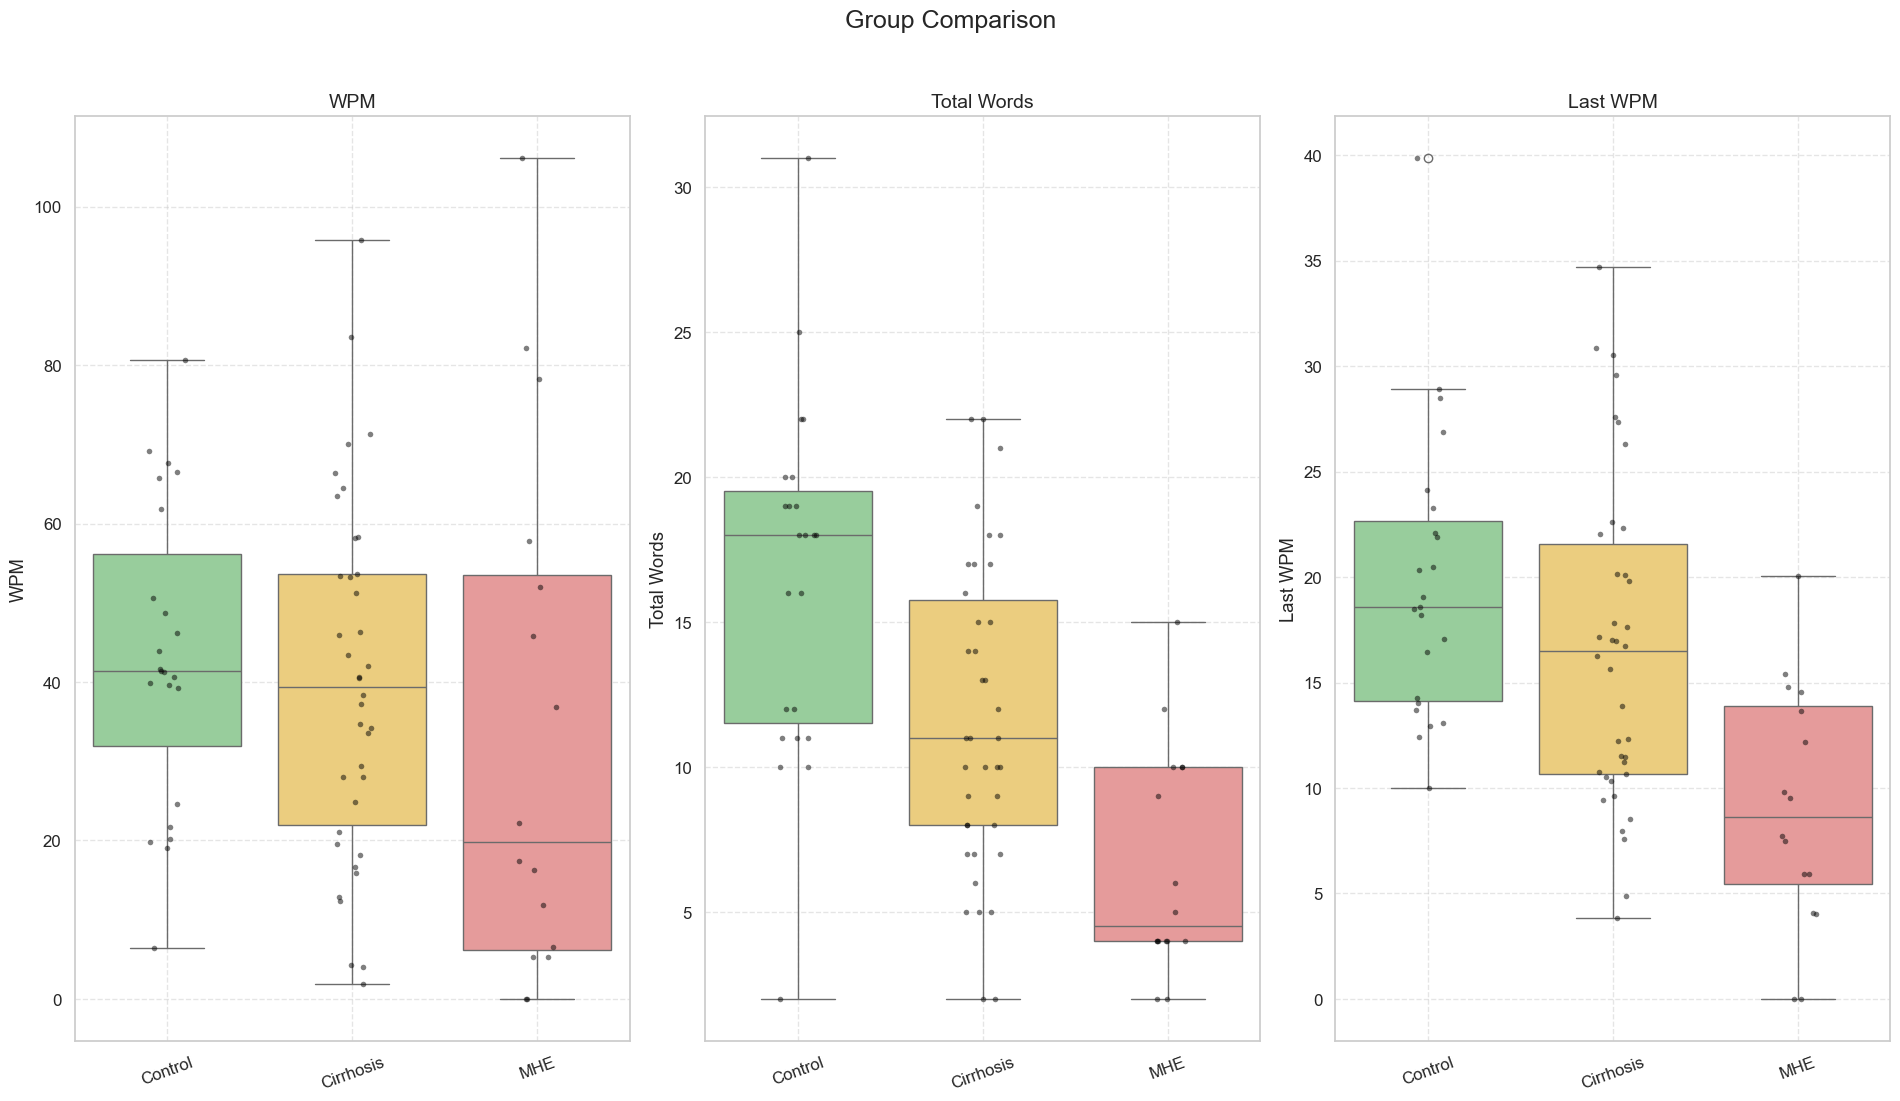

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a mostrar y sus etiquetas traducidas
variables_deseadas = {
    "ppm_promedio": "WPM",
    "total_palabras": "Total Words",
    "ppm_final": "Last WPM"
}

# Normalizar valores y traducir grupos
df_resultado["grupo"] = df_resultado["grupo"].str.lower().str.strip().replace({
    "control": "Control",
    "cirrosis": "Cirrhosis",
    "encefalopatía": "MHE"
})

# Paleta y estilo
sns.set(style="whitegrid", font_scale=1.1)
colores = {
    "Control": "#8fd694",
    "Cirrhosis": "#fdd56d",
    "MHE": "#f28e8e"
}
orden_grupos = ["Control", "Cirrhosis", "MHE"]

# Crear figura en proporción de 1920x1080 (Full HD)
fig, axs = plt.subplots(1, 3, figsize=(19.2, 10.8), sharey=False)  # pulgadas, dpi 100 → 1920x1080 px

for i, (campo, etiqueta) in enumerate(variables_deseadas.items()):
    ax = axs[i]
    datos_plot = df_resultado[["grupo", campo]].dropna()

    if datos_plot.empty:
        ax.set_visible(False)
        continue

    sns.boxplot(
        data=datos_plot, x="grupo", y=campo,
        palette=colores, order=orden_grupos, ax=ax
    )
    sns.stripplot(
        data=datos_plot, x="grupo", y=campo,
        color='black', alpha=0.5, jitter=True,
        dodge=True, size=4, order=orden_grupos, ax=ax
    )

    ax.set_title(etiqueta, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel(etiqueta)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis='x', rotation=20)

plt.suptitle("Group Comparison", fontsize=18, y=1.02)
plt.tight_layout()

# Guardar imagen en Full HD (1920 x 1080)
plt.savefig("boxplots_fullhd.png", dpi=100)  # dpi=100 x figsize=(19.2, 10.8) = 1920x1080
plt.show()


In [14]:
conteo_por_grupo = df_resultado["grupo"].value_counts()
print(conteo_por_grupo)



grupo
Cirrhosis    38
Control      23
MHE          16
Name: count, dtype: int64
